<a href="https://colab.research.google.com/github/Lahasyakr/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

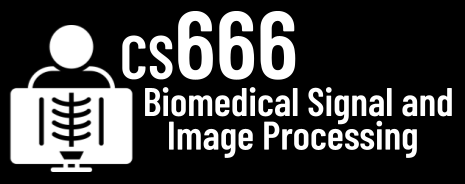
#Assignment 5

In [2]:
# NAME:Lahasya Kakkadde Rajanna

In [3]:
# In this assignment, we will visualize and explore a CT scan!

In [4]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.8 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [6]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [7]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [8]:
# TODO: YOUR_ANSWER 
#220 slices


220 slices 

In [9]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [10]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

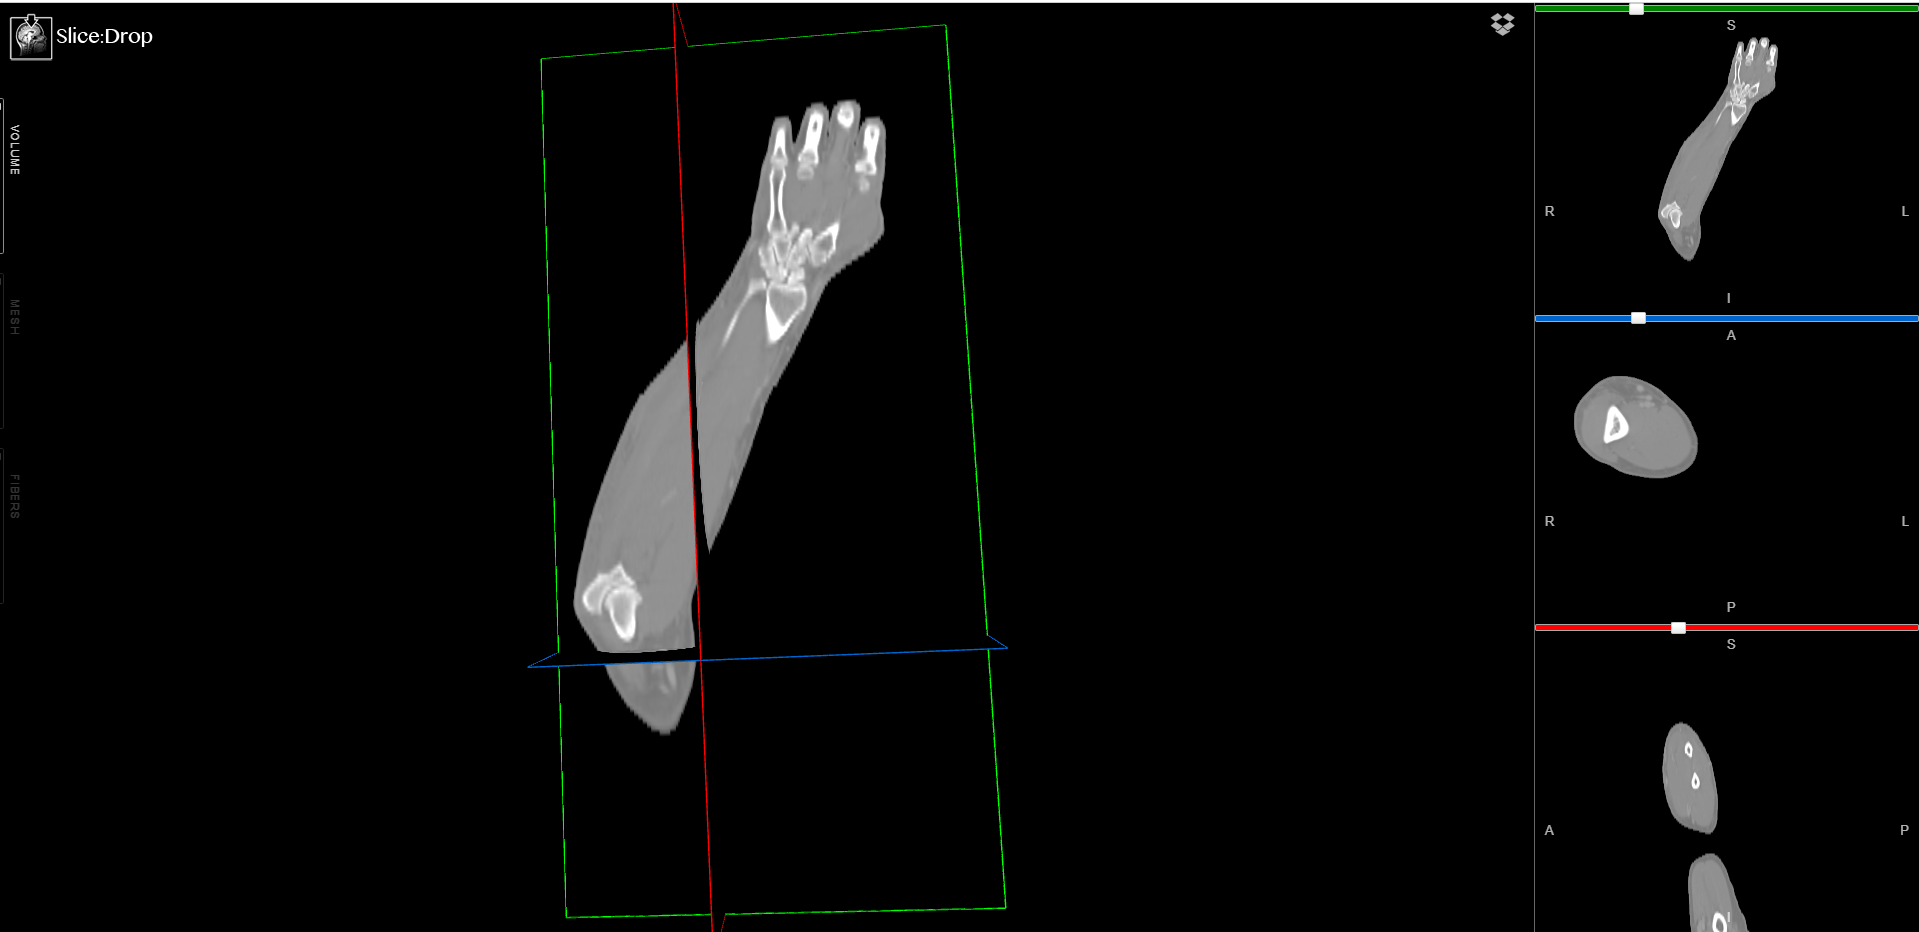

In [11]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [12]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

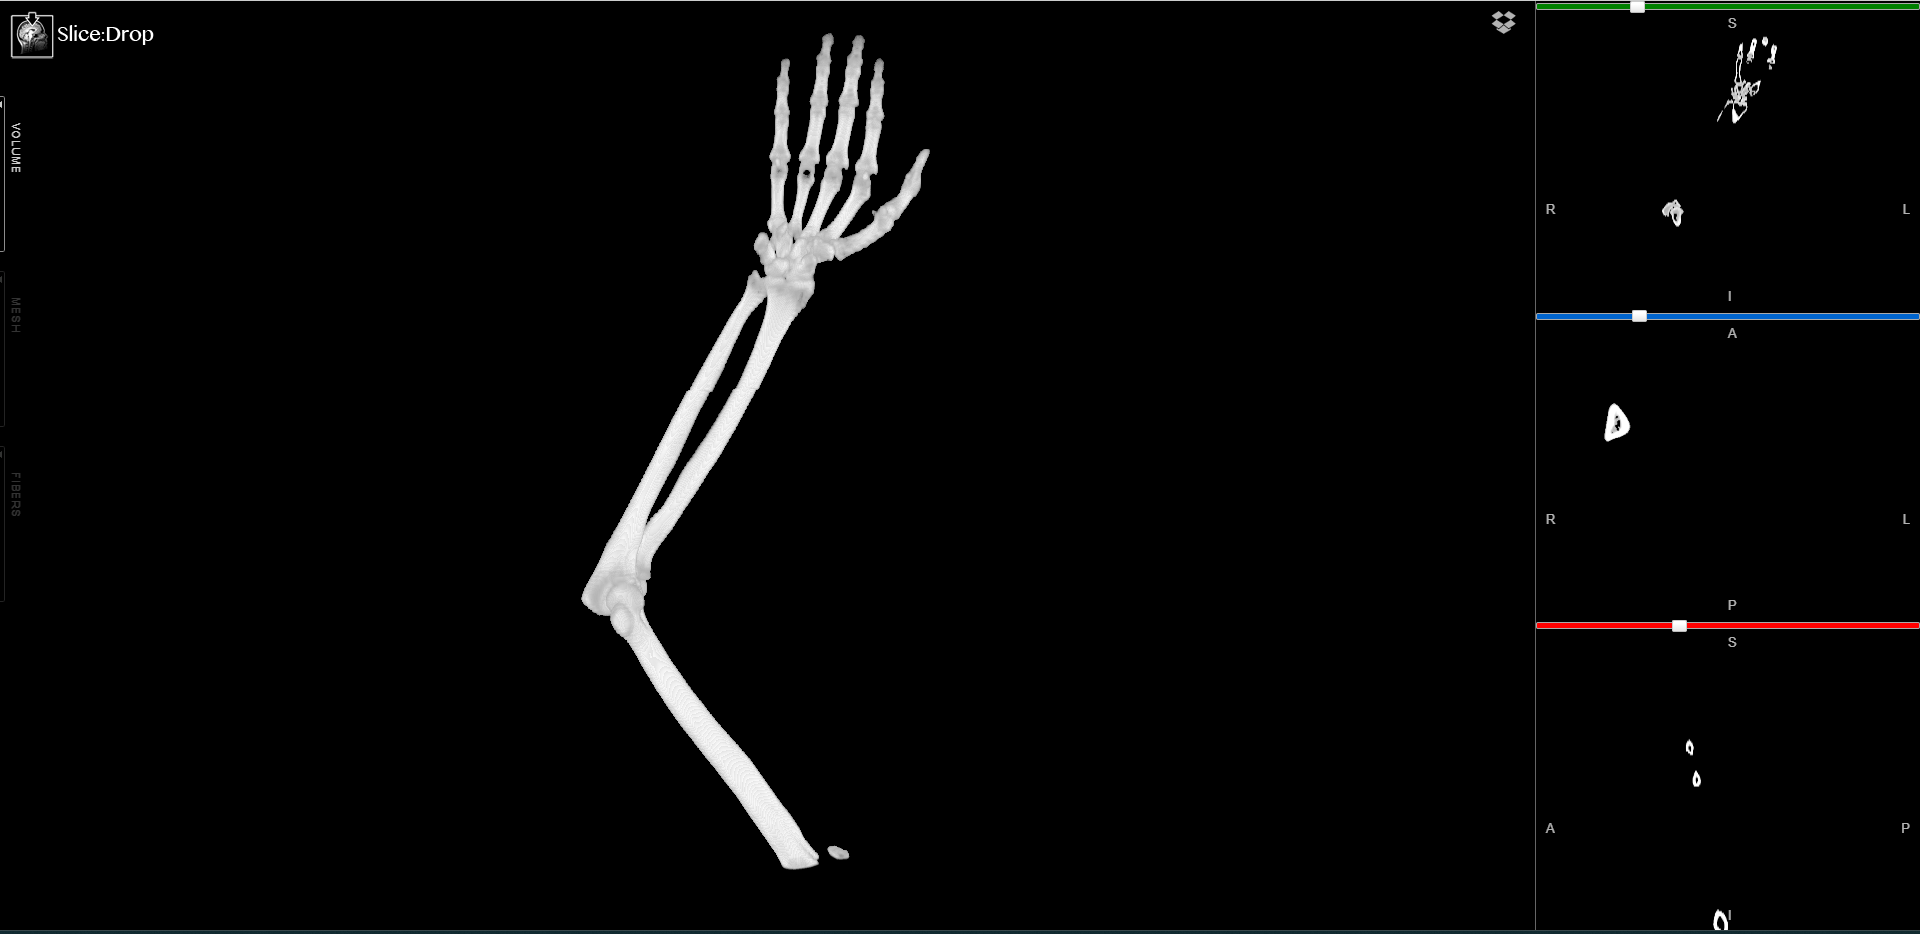

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [13]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [15]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [16]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [17]:
from pydicom import dcmread

In [18]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

import os, pydicom
path = "./ct/"
dicom_files = os.listdir(path)
dicom_files.sort()
print(dicom_files)

first_image = pydicom.dcmread(os.path.join(path, dicom_files[0]))

#reading the dimensions of a first image slice to properly create the 3D numpy array.

first_dimention = (int(first_image.Rows), int(first_image.Columns), len(dicom_files))
# print(dimention_3d)
dicom_array = numpy.zeros(first_dimention, dtype=first_image.pixel_array.dtype)

for i, file_i in enumerate(dicom_files):
  dfile = pydicom.dcmread(os.path.join(path, file_i))
  image_data = dfile.pixel_array
  dicom_array[:, :, i] = image_data

print(dicom_array)
print(first_dimention[2])

['IM-0001-0001.dcm', 'IM-0001-0002.dcm', 'IM-0001-0003.dcm', 'IM-0001-0004.dcm', 'IM-0001-0005.dcm', 'IM-0001-0006.dcm', 'IM-0001-0007.dcm', 'IM-0001-0008.dcm', 'IM-0001-0009.dcm', 'IM-0001-0010.dcm', 'IM-0001-0011.dcm', 'IM-0001-0012.dcm', 'IM-0001-0013.dcm', 'IM-0001-0014.dcm', 'IM-0001-0015.dcm', 'IM-0001-0016.dcm', 'IM-0001-0017.dcm', 'IM-0001-0018.dcm', 'IM-0001-0019.dcm', 'IM-0001-0020.dcm', 'IM-0001-0021.dcm', 'IM-0001-0022.dcm', 'IM-0001-0023.dcm', 'IM-0001-0024.dcm', 'IM-0001-0025.dcm', 'IM-0001-0026.dcm', 'IM-0001-0027.dcm', 'IM-0001-0028.dcm', 'IM-0001-0029.dcm', 'IM-0001-0030.dcm', 'IM-0001-0031.dcm', 'IM-0001-0032.dcm', 'IM-0001-0033.dcm', 'IM-0001-0034.dcm', 'IM-0001-0035.dcm', 'IM-0001-0036.dcm', 'IM-0001-0037.dcm', 'IM-0001-0038.dcm', 'IM-0001-0039.dcm', 'IM-0001-0040.dcm', 'IM-0001-0041.dcm', 'IM-0001-0042.dcm', 'IM-0001-0043.dcm', 'IM-0001-0044.dcm', 'IM-0001-0045.dcm', 'IM-0001-0046.dcm', 'IM-0001-0047.dcm', 'IM-0001-0048.dcm', 'IM-0001-0049.dcm', 'IM-0001-0050.dcm',

In [19]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

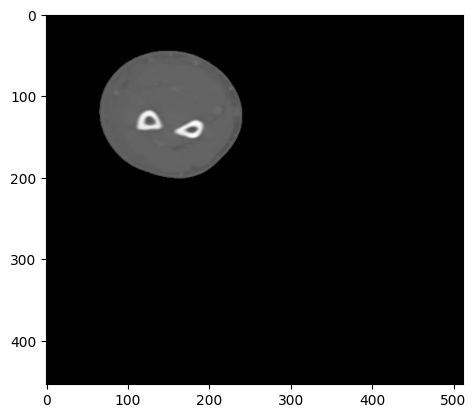

In [20]:
# TODO: YOUR CODE FOR AXIAL
axial_slice = dicom_array[:, :, first_dimention[2]//2]
plt.imshow(axial_slice, cmap='gray')
plt.show()

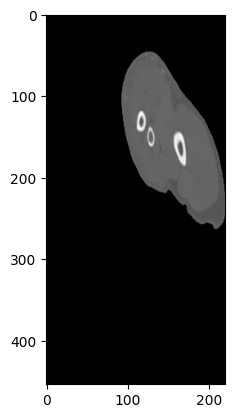

In [21]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_slice = dicom_array[:, first_dimention[2]//2, :]
plt.imshow(sagittal_slice, cmap='gray')
plt.show()

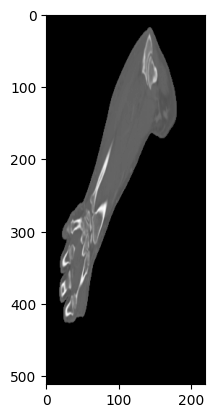

In [22]:
# TODO: YOUR CODE FOR CORONAL
coronal_slice = dicom_array[first_dimention[2]//2, :, :]
plt.imshow(coronal_slice, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [23]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [24]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

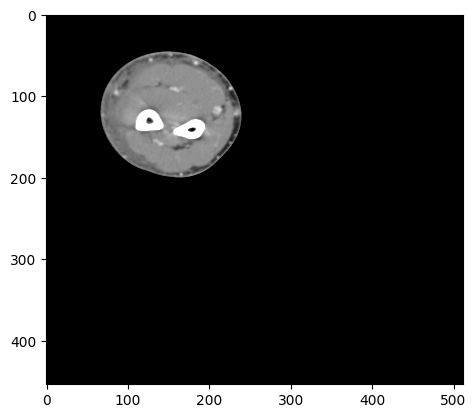

In [67]:
# TODO: YOUR CODE


data = pydicom.dcmread(os.path.join(path, dicom_files[110]))
window_center = data[('0028','1050')].value
window_width = data[('0028','1051')].value
rescale_intercept = data[('0028','1052')].value

image = data.pixel_array
image = image  + rescale_intercept  #for translation adjustments given in the dicom file. 

vmin = window_center  - window_width//2 #minimum HU level
vmax = window_center  + window_width//2 #maximum HU level

plt.imshow(image, cmap='gray', vmin = vmin, vmax = vmax) 
plt.show()


In [26]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

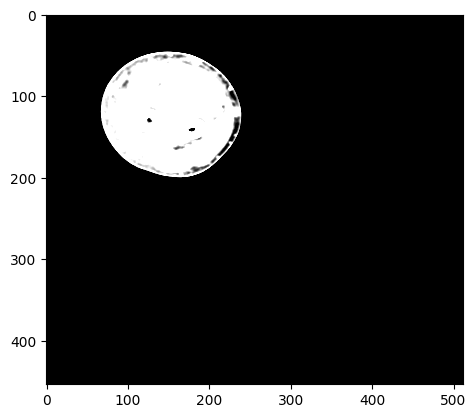

In [70]:
# TODO: YOUR CODE

# Fat tissue window 
# Level: -50 HU; Width: 100 HU 

level = -50 
window = 100

vmin = level - window//2 #minimum HU level
vmax = level + window//2 #maximum HU level

plt.imshow(image, cmap='gray', vmin = vmin, vmax = vmax) 
plt.show()

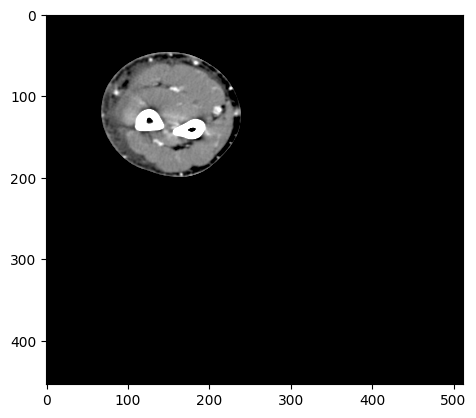

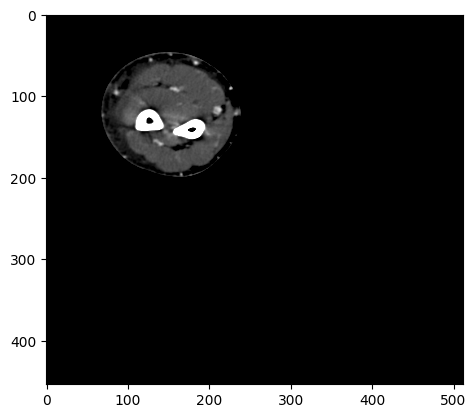

In [71]:
# Soft tissue window 
# Level: +50 HU; Width: +200 HU (Range: −125 to +225)

level = 50 
window = 200

vmin = level - window//2 
vmax = level + window//2 

plt.imshow(image, cmap='gray', vmin = vmin, vmax = vmax) 
plt.show()


level = 100 
window = 220

vmin = level - window//2 
vmax = level + window//2 

plt.imshow(image, cmap='gray', vmin = vmin, vmax = vmax) 
plt.show()

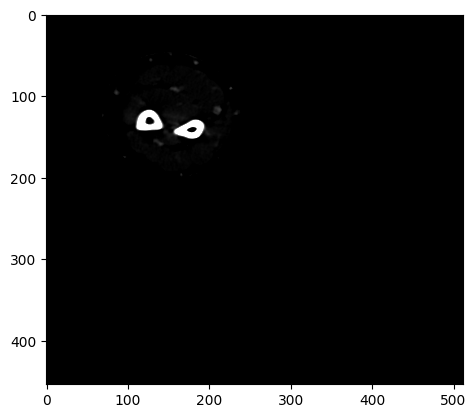

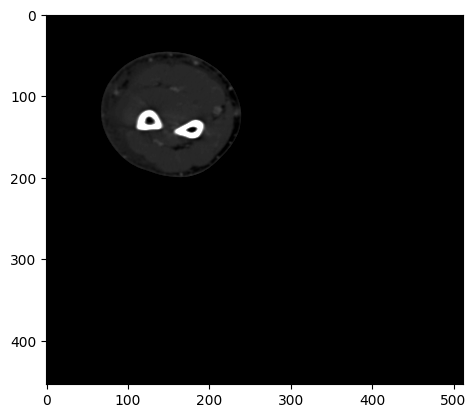

In [72]:
# Bone window 
# Level: +300 HU; Width: +500, +1000 HU


level = 300 
window = 500

vmin1 = level - window//2 
vmax1 = level + window//2

level = 400
window = 1000

vmin2 = level - window//2
vmax2 = level + window//2 

plt.imshow(image, cmap='gray', vmin = vmin1, vmax = vmax1) 
plt.show()

plt.imshow(image, cmap='gray', vmin = vmin2, vmax = vmax2) 
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

# I used different window level which falls under different categories
# first image is of fat tisuue
# second image is soft tissue 
# third and fourth images are bone tissue 
# to me soft bone tissue range image make more sense since its gives better visulization - (Range: −125 to +225).

I used different window level which falls under different categories
* first image is of fat tisuue
* second image is soft tissue 
* third and fourth images are bone tissue
* to me soft bone tissue range image make more sense since its gives better visulization - (Range: −125 to +225).

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [47]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

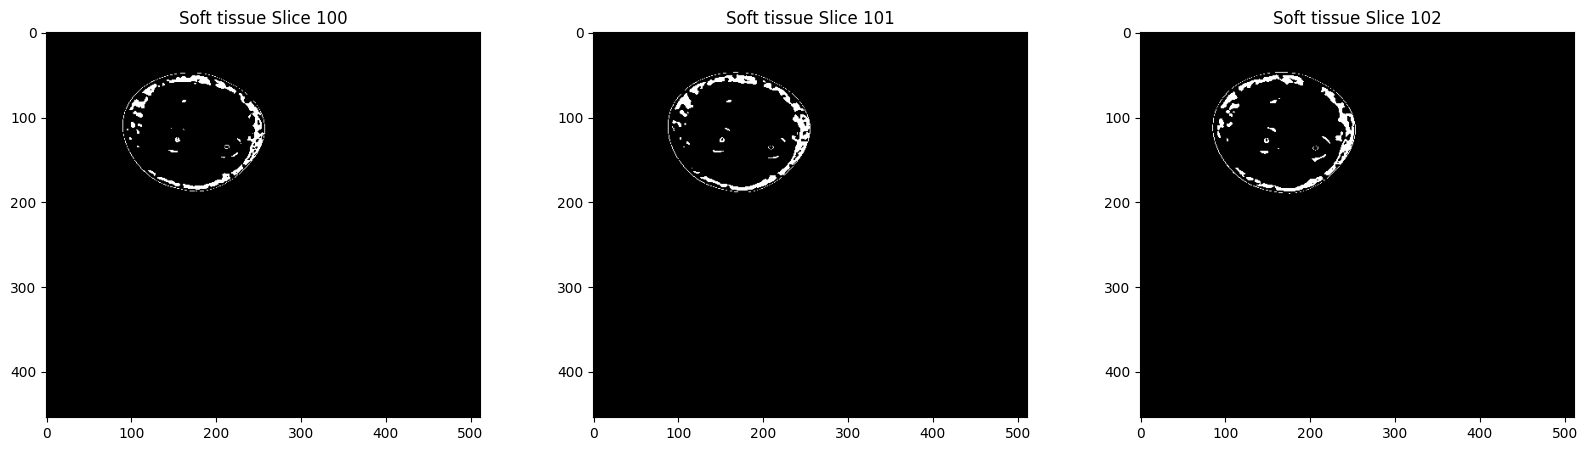

In [65]:
# TODO: YOUR CODE TO SEGMENT FAT
new_mask = (dicom_array.copy()).astype(np.int16)
new_mask = new_mask + rescale_intercept
new_mask[(new_mask  < -100)] = 0
new_mask[new_mask > 0] = 0

new_mask[new_mask != 0] = 1



f = plt.figure(figsize=(20,5))

for i in range(3):
  f.add_subplot(1,3 , i+1)
  plt.imshow(new_mask[:, :, i+100], cmap='gray')
  plt.title("Soft tissue Slice {}".format(i+100))
  
plt.show(block=True)





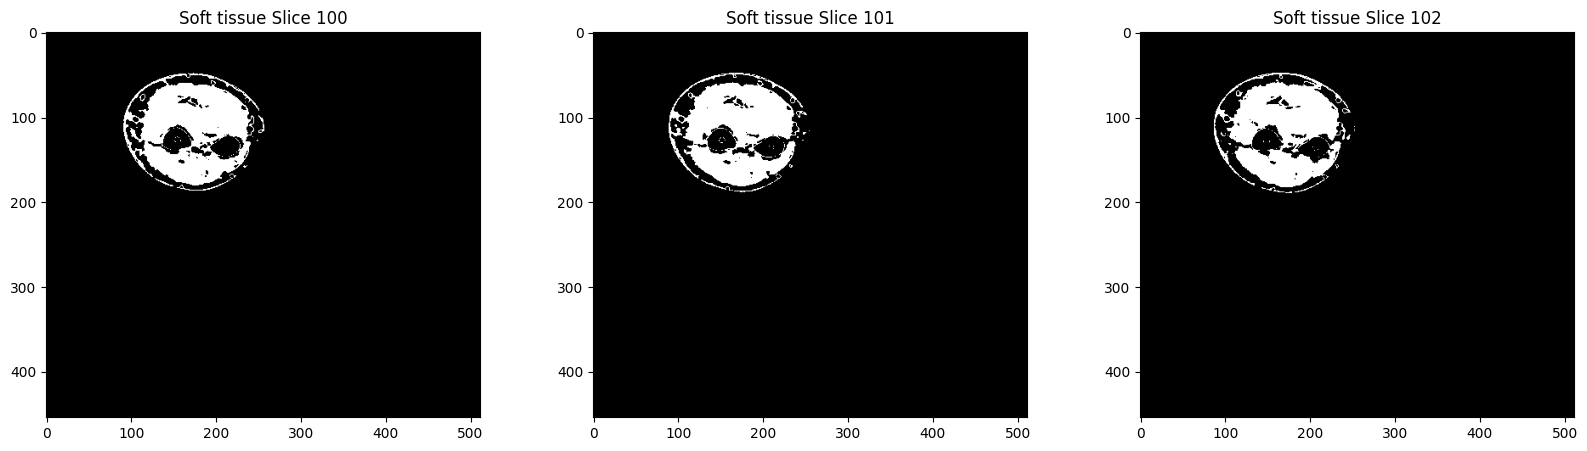

In [63]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

new_mask = (dicom_array.copy()).astype(np.int16)
new_mask = new_mask + rescale_intercept
new_mask[new_mask  < 30 ] = 0
new_mask[new_mask  > 80 ] = 0

new_mask[new_mask != 0] = 1

f = plt.figure(figsize=(20,5))

for i in range(3):
  f.add_subplot(1,3 , i+1)
  plt.imshow(new_mask[:, :, i+100], cmap = 'gray')
  plt.title("Soft tissue Slice {}".format(i+100))
  
plt.show(block=True)



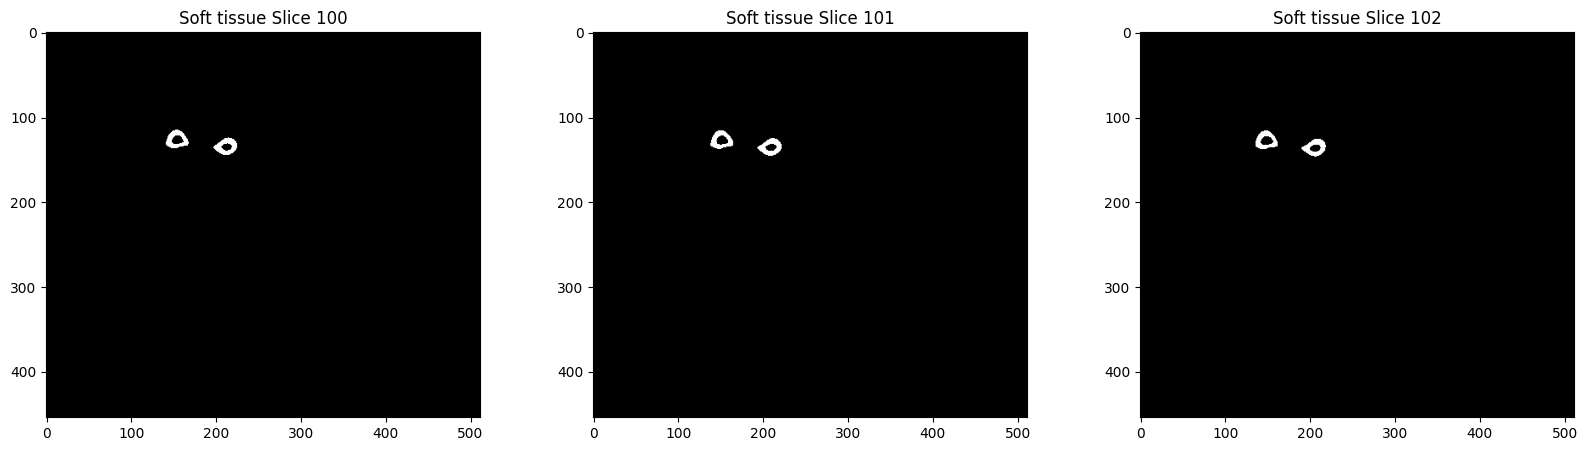

In [64]:
# TODO: YOUR CODE TO SEGMENT BONES
new_mask = (dicom_array.copy()).astype(np.int16)
new_mask = new_mask + rescale_intercept
new_mask[new_mask < 1000 ] = 0
new_mask[new_mask != 0] = 1

f = plt.figure(figsize=(20,5))

for i in range(3):
  f.add_subplot(1,3 , i+1)
  plt.imshow(new_mask[:, :, i+100], cmap = 'gray')
  plt.title("Soft tissue Slice {}".format(i+100))
  
plt.show(block=True)


In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
# Yes They are pretty good. 
# when i tried with the actual Hounsfield Units did not work so well, so I 
# increased the window for each of the masks and it made it 
# look better.

Yes They are pretty good. 
when i tried with the actual Hounsfield Units did not work so well, so I 
increased the window for each of the masks and it made it look better

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""